👕 Detected Shirt Color (RGB): (233, 227, 235)
🎨 Detected Color Name: white


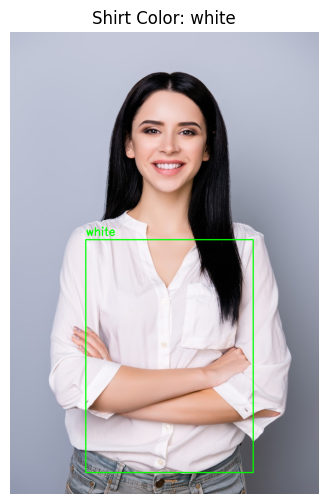

In [8]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

def get_dominant_color(image, k=3):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(pixels)
    counts = Counter(kmeans.labels_)
    dominant_color = kmeans.cluster_centers_[counts.most_common(1)[0][0]]
    return tuple(map(int, dominant_color))

def rgb_to_color_name(rgb):
    color_names = {
        'red': (255, 0, 0),
        'blue': (0, 0, 255),
        'green': (0, 255, 0),
        'white': (255, 255, 255),
        'black': (0, 0, 0),
        'yellow': (255, 255, 0),
        'gray': (128, 128, 128),
        'brown': (150, 75, 0),
        'pink': (255, 192, 203),
        'orange': (255, 165, 0),
        'purple': (128, 0, 128)
    }
    min_dist = float('inf')
    closest_name = "unknown"
    for name, value in color_names.items():
        dist = np.linalg.norm(np.array(rgb) - np.array(value))
        if dist < min_dist:
            min_dist = dist
            closest_name = name
    return closest_name

def detect_shirt_color(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("No person detected.")
        return

    landmarks = results.pose_landmarks.landmark
    h, w, _ = image.shape

    left_shoulder = landmarks[11]
    right_shoulder = landmarks[12]
    left_hip = landmarks[23]
    right_hip = landmarks[24]

    x1 = int(min(left_shoulder.x, right_shoulder.x) * w)
    x2 = int(max(left_shoulder.x, right_shoulder.x) * w)
    y1 = int(min(left_shoulder.y, right_shoulder.y) * h)
    y2 = int(max(left_hip.y, right_hip.y) * h)

    x1 = max(x1 - 20, 0)
    x2 = min(x2 + 20, w)
    y1 = max(y1 - 20, 0)
    y2 = min(y2 + 20, h)

    shirt_roi = image[y1:y2, x1:x2]

    if shirt_roi.size == 0:
        print("Shirt region could not be extracted.")
        return

    dominant_rgb = get_dominant_color(shirt_roi)
    color_name = rgb_to_color_name(dominant_rgb)

    print(f"👕 Detected Shirt Color (RGB): {dominant_rgb}")
    print(f"🎨 Detected Color Name: {color_name}")

    # Draw rectangle and label
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image_rgb, f'{color_name}', (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show in Jupyter
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f'Shirt Color: {color_name}')
    plt.show()

# Example usage
image_path = r"gender-dataset/female/image_32.jpg"  # Make sure path and slashes are correct
detect_shirt_color(image_path)


👕 Detected Shirt Color (RGB): (83, 95, 99)
🎨 Detected Color Name: gray


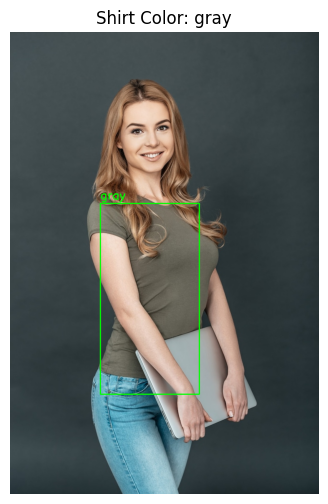

In [11]:
# Example usage
image_path = r"gender-dataset/female/image_35.jpg"  # Make sure path and slashes are correct
detect_shirt_color(image_path)

👕 Detected Shirt Color (RGB): (23, 18, 20)
🎨 Detected Color Name: black


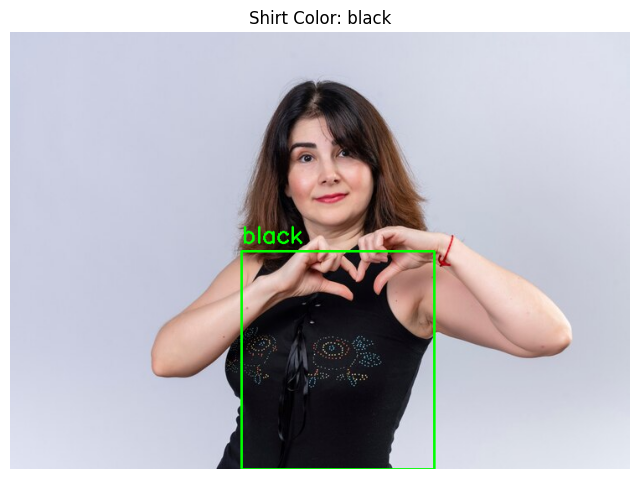

In [18]:
# Example usage
image_path = r"gender-dataset/female/image_710.jpg"  # Make sure path and slashes are correct
detect_shirt_color(image_path)

👕 Detected Shirt Color (RGB): (175, 184, 236)
🎨 Detected Color Name: pink


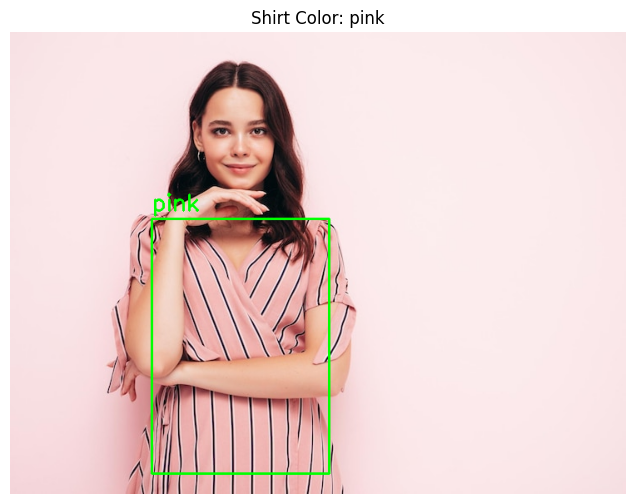

In [20]:
# Example usage
image_path = r"gender-dataset/female/image_322.jpg"  # Make sure path and slashes are correct
detect_shirt_color(image_path)